In [15]:
import pandas as pd

#reading in the data
project_df = pd.read_csv('C:\\Users\\adhit\\Downloads\\project-csv.csv')
project_df.shape

(35303, 19)

In [16]:
pwd

'C:\\Users\\adhit\\Desktop\\pers\\coding challenge\\git_code\\topic_modelling'

# Checking & removing the duplicates


In [17]:
#Removing duplicates

project_df['dup'] = project_df.duplicated(subset=None, keep='first')
project_df.head()

,id,acronym,status,title,startDate,endDate,totalCost,ecMaxContribution,legalBasis,topics,ecSignatureDate,frameworkProgramme,masterCall,subCall,fundingScheme,nature,objective,contentUpdateDate,rcn,dup
0,101034345,DOROTHY,SIGNED,DevelOp interdisciplinaRy apprOaches to healTH...,2021-09-01T00:00:00Z,2026-08-31T00:00:00Z,5517000.0,2758500.00,H2020-EU.1.3.,MSCA-COFUND-2020,2021-04-27T00:00:00Z,H2020,H2020-MSCA-COFUND-2020,H2020-MSCA-COFUND-2020,MSCA-COFUND-FP,NaN,Responding to the need to equip European socie...,2021-09-02T20:45:37Z,235801,False
1,101034926,CNergy,SIGNED,Carbon Nanomembranes for Energy Storage Applic...,2021-05-01T00:00:00Z,2022-01-31T00:00:00Z,0.0,100000.00,NaN,FETOPEN-03-2018-2019-2020,NaN,H2020,NaN,H2020-FETOPEN-2018-2019-2020-4,CSA-LSP,NaN,CNM Technologies (CNMT) has developed a highly...,2021-05-21T11:29:04Z,235780,False
2,957151,SATELLITE IA,SIGNED,Advanced MMICs for SOTM and satellites constel...,2020-10-01T00:00:00Z,2021-12-31T00:00:00Z,0.0,109500.00,H2020-EU.2.3.,INNOSUP-02-2019-2020,2020-09-15T00:00:00Z,H2020,H2020-INNOSUP-2018-2020,H2020-INNOSUP-2020-02,CSA-LSP,NaN,The proliferation of LEO (Low Earth Orbit) and...,2021-10-05T18:36:06Z,231593,False
3,970958,TilePlus,SIGNED,Ground-breaking roof tile solution for solar e...,2021-06-01T00:00:00Z,2023-05-31T00:00:00Z,3472500.0,2430750.00,NaN,EIC-FTI-2018-2020,NaN,H2020,NaN,H2020-EIC-FTI-2018-2020,IA,NaN,The overall objective of the project is to mat...,2021-05-21T14:25:08Z,236314,False
4,970564,IMPOWER2X,SIGNED,INERATEC Modular Plants for Renewable Chemical...,2021-05-01T00:00:00Z,2023-04-30T00:00:00Z,3492082.5,2444457.75,NaN,EIC-SMEInst-2018-2020,NaN,H2020,NaN,H2020-EIC-SMEInst-2018-2020-3,SME-2b,NaN,INERATEC (IC) sells modular chemical plants fo...,2021-05-21T14:24:55Z,236312,False


In [18]:
# removing the duplicate columns.

project_df = project_df[project_df['dup'] == False]

In [19]:
project_df.shape

(35303, 20)

In [20]:
#deleting the column 'dup'
del project_df['dup']


# Text Preprocessing

In [21]:
import re
import spacy
from spacy.lang.en import English
from nltk.stem.snowball import SnowballStemmer
nlp = English()
nlp2= spacy.load('en_core_web_sm')
tokenizer = nlp.tokenizer
s_stemmer=SnowballStemmer(language='english')

def preprocess(input_text):
    
    # regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", input_text)
    
    # convert to lower case
    text_to_lower_case= letters_only_text.lower()
    
    
    # word tokenization
    token_list = []
    tokens = tokenizer(text_to_lower_case)
    for token in tokens:
        token_list.append(token.text)
    
    
    #stop words removal
    stop_words_removed_text=[]
    for tok in token_list:
        if nlp.vocab[tok].is_stop == False and len(tok.strip())!=0 and len(tok)!=1:
            stop_words_removed_text.append(tok)
#     print(stop_words_removed_text)


#      stemming
#     stemmed_text=[]
#     for word in stop_words_removed_text:
#         stemmed_text.append(s_stemmer.stem(word))
#      print(stemmed_text)
    
    
    #Lemmatization
    lemmatized_text=[]
    string=''
    for w in stop_words_removed_text:
        if string=='':
            string = w
        else:
            string= string + ' ' + w 
#     print(string)
    nlp_string = nlp2(string)
    for word in nlp_string:
        lemmatized_text.append(word.lemma_)
#     print(lemmatized_text)
    

    # converting list back to string
    return " ".join(lemmatized_text)

In [22]:
project_df['Cleaned_objective'] = project_df['objective'].apply(preprocess)

In [23]:
project_df[['id','objective','Cleaned_objective']]

,id,objective,Cleaned_objective
0,101034345,Responding to the need to equip European socie...,respond need equip european society multi disc...
1,101034926,CNM Technologies (CNMT) has developed a highly...,cnm technologies cnmt develop highly permeable...
2,957151,The proliferation of LEO (Low Earth Orbit) and...,proliferation leo low earth orbit meo medium e...
3,970958,The overall objective of the project is to mat...,overall objective project mature qualify enabl...
4,970564,INERATEC (IC) sells modular chemical plants fo...,ineratec ic sell modular chemical plant produc...
...,...,...,...
35298,694816,"Regione Liguria, together with IRE (its depend...",regione liguria ire dependent agency energy in...
35299,952008,The overall aim of the ExCEED project is to re...,overall aim exceed project recruit outstanding...
35300,952390,"TRANSCEND, designed as a translational researc...",transcend design translational research centre...
35301,699641,The proposal aims to promote the interest and ...,proposal aim promote interest investment small...


# Finding the commonly used words in each project

In [24]:

from collections import Counter

project_df['common_words']=''
for i in range(len(project_df["Cleaned_objective"])):
    common_w=[]
    tokens=project_df["Cleaned_objective"][i].split()
    comm=Counter(" ".join(tokens).split()).most_common(10)
#     print(comm)
    for j in comm:
        common_w.append(j[0])
#     print(common_w)
    project_df['common_words'][i]=common_w
    

C:\Users\adhit\AppData\Local\Temp/ipykernel_17604/2745669330.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  project_df['common_words'][i]=common_w


In [16]:
#project_df.to_csv("project_df.csv")

In [25]:
project_df.head()

,id,acronym,status,title,startDate,endDate,totalCost,ecMaxContribution,legalBasis,topics,...,frameworkProgramme,masterCall,subCall,fundingScheme,nature,objective,contentUpdateDate,rcn,Cleaned_objective,common_words
0,101034345,DOROTHY,SIGNED,DevelOp interdisciplinaRy apprOaches to healTH...,2021-09-01T00:00:00Z,2026-08-31T00:00:00Z,5517000.0,2758500.00,H2020-EU.1.3.,MSCA-COFUND-2020,...,H2020,H2020-MSCA-COFUND-2020,H2020-MSCA-COFUND-2020,MSCA-COFUND-FP,NaN,Responding to the need to equip European socie...,2021-09-02T20:45:37Z,235801,respond need equip european society multi disc...,"[health, public, research, tackle, future, cri..."
1,101034926,CNergy,SIGNED,Carbon Nanomembranes for Energy Storage Applic...,2021-05-01T00:00:00Z,2022-01-31T00:00:00Z,0.0,100000.00,NaN,FETOPEN-03-2018-2019-2020,...,H2020,NaN,H2020-FETOPEN-2018-2019-2020-4,CSA-LSP,NaN,CNM Technologies (CNMT) has developed a highly...,2021-05-21T11:29:04Z,235780,cnm technologies cnmt develop highly permeable...,"[membrane, cnm, thin, introduce, cnmt, selecti..."
2,957151,SATELLITE IA,SIGNED,Advanced MMICs for SOTM and satellites constel...,2020-10-01T00:00:00Z,2021-12-31T00:00:00Z,0.0,109500.00,H2020-EU.2.3.,INNOSUP-02-2019-2020,...,H2020,H2020-INNOSUP-2018-2020,H2020-INNOSUP-2020-02,CSA-LSP,NaN,The proliferation of LEO (Low Earth Orbit) and...,2021-10-05T18:36:06Z,231593,proliferation leo low earth orbit meo medium e...,"[orbit, satellite, earth, requirement, need, a..."
3,970958,TilePlus,SIGNED,Ground-breaking roof tile solution for solar e...,2021-06-01T00:00:00Z,2023-05-31T00:00:00Z,3472500.0,2430750.00,NaN,EIC-FTI-2018-2020,...,H2020,NaN,H2020-EIC-FTI-2018-2020,IA,NaN,The overall objective of the project is to mat...,2021-05-21T14:25:08Z,236314,overall objective project mature qualify enabl...,"[solar, roof, tile, high, project, market, pan..."
4,970564,IMPOWER2X,SIGNED,INERATEC Modular Plants for Renewable Chemical...,2021-05-01T00:00:00Z,2023-04-30T00:00:00Z,3492082.5,2444457.75,NaN,EIC-SMEInst-2018-2020,...,H2020,NaN,H2020-EIC-SMEInst-2018-2020-3,SME-2b,NaN,INERATEC (IC) sells modular chemical plants fo...,2021-05-21T14:24:55Z,236312,ineratec ic sell modular chemical plant produc...,"[ic, customer, plant, renewable, co, fuel, rea..."


# Word cloud

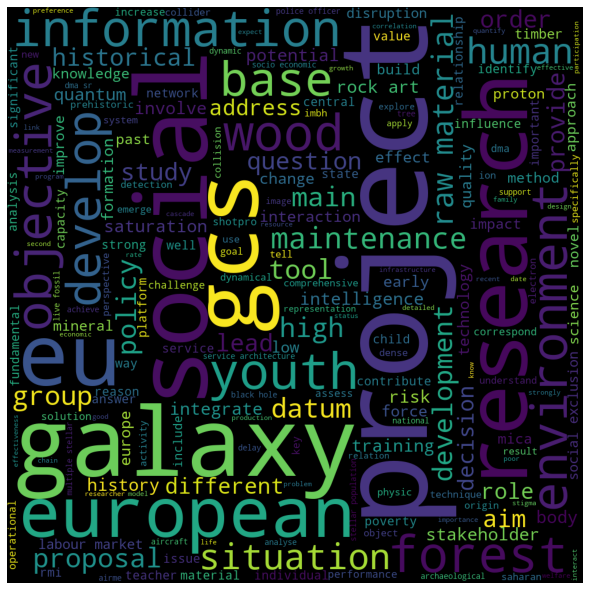

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import random

all_words = ''


for k in range(10):
    random_int= random.randint(0,35303)
    tokens2= project_df['Cleaned_objective'][random_int].split()
    all_words += " ".join(tokens2)+ " "
#     print(all_words)
    
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='black', 
                min_font_size = 10).generate(all_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# Topic Modelling

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


#using count vectorizer to consider words with 3 letters and the words should minimum appear in 10 documents and use this to create a document term matrix.
cv = CountVectorizer(max_df=0.9,min_df=10,stop_words='english',token_pattern='[a-zA-Z0-9]{3,}')
dtm= cv.fit_transform(project_df['Cleaned_objective'])



In [28]:
#initializing LDA with 10 components and learning decay as 0.7. Fit the LDA algorithm with the created Document term matrix.

LDA= LatentDirichletAllocation(n_components=10,random_state=50,learning_decay=0.7)
LDA.fit(dtm)

LatentDirichletAllocation(random_state=50)

# Grab topics

In [29]:
LDA.components_.shape

(10, 14335)

In [40]:
# Grab top 15 words with highest probability

for i, topic in enumerate(LDA.components_):
    print([cv.get_feature_names()[index] for index in topic.argsort()[-30:]])
    

['objective', 'lead', 'consortium', 'include', 'aim', 'international', 'university', 'provide', 'academic', 'programme', 'skill', 'activity', 'scientific', 'knowledge', 'develop', 'europe', 'science', 'industry', 'new', 'partner', 'support', 'network', 'development', 'technology', 'innovation', 'training', 'researcher', 'european', 'project', 'research']
['stakeholder', 'approach', 'increase', 'assessment', 'process', 'europe', 'aim', 'tool', 'objective', 'environmental', 'capacity', 'european', 'base', 'economic', 'building', 'provide', 'sustainable', 'model', 'impact', 'develop', 'climate', 'policy', 'water', 'support', 'service', 'management', 'sme', 'innovation', 'project', 'energy']
['current', 'innovative', 'design', 'material', 'phase', 'industrial', 'time', 'use', 'power', 'business', 'need', 'low', 'base', 'energy', 'increase', 'new', 'reduce', 'company', 'year', 'process', 'industry', 'develop', 'production', 'project', 'high', 'solution', 'product', 'cost', 'technology', 'ma

In [31]:
topic_results=LDA.transform(dtm)

In [32]:
topic_results.shape

(35303, 10)

In [33]:
#adding the topic number to the project_df table.

project_df['topic_number'] = topic_results.argmax(axis=1)

In [34]:
# creating a topic dictionary and mapping the topic name towards the label.

topic_dict={0:"Physics & Technology",
1:"Culture & Society",
2:"History",
3:"Industry & Research",
4:"Information Technology",
5:"Medical & Health",
6:"Chemical & Material Science",
7:"Environment",
8:"Research & Development",
9:"Space & Research"}

In [35]:
#created a new column and mapped the topic labels.

project_df['topic_label']= project_df['topic'].map(topic_dict)

In [73]:
project_df.head()

,id,acronym,status,title,startDate,endDate,totalCost,ecMaxContribution,legalBasis,topics,...,subCall,fundingScheme,nature,objective,contentUpdateDate,rcn,Cleaned_objective,common_words,topic,topic_label
0,101034345,DOROTHY,SIGNED,DevelOp interdisciplinaRy apprOaches to healTH...,2021-09-01T00:00:00Z,2026-08-31T00:00:00Z,5517000.0,2758500.00,H2020-EU.1.3.,MSCA-COFUND-2020,...,H2020-MSCA-COFUND-2020,MSCA-COFUND-FP,NaN,Responding to the need to equip European socie...,2021-09-02T20:45:37Z,235801,respond need equip european society multi disc...,"[health, public, research, tackle, future, cri...",6,Chemical & Material Science
1,101034926,CNergy,SIGNED,Carbon Nanomembranes for Energy Storage Applic...,2021-05-01T00:00:00Z,2022-01-31T00:00:00Z,0.0,100000.00,NaN,FETOPEN-03-2018-2019-2020,...,H2020-FETOPEN-2018-2019-2020-4,CSA-LSP,NaN,CNM Technologies (CNMT) has developed a highly...,2021-05-21T11:29:04Z,235780,cnm technologies cnmt develop highly permeable...,"[membrane, cnm, thin, introduce, cnmt, selecti...",6,Chemical & Material Science
2,957151,SATELLITE IA,SIGNED,Advanced MMICs for SOTM and satellites constel...,2020-10-01T00:00:00Z,2021-12-31T00:00:00Z,0.0,109500.00,H2020-EU.2.3.,INNOSUP-02-2019-2020,...,H2020-INNOSUP-2020-02,CSA-LSP,NaN,The proliferation of LEO (Low Earth Orbit) and...,2021-10-05T18:36:06Z,231593,proliferation leo low earth orbit meo medium e...,"[orbit, satellite, earth, requirement, need, a...",9,Space & Research
3,970958,TilePlus,SIGNED,Ground-breaking roof tile solution for solar e...,2021-06-01T00:00:00Z,2023-05-31T00:00:00Z,3472500.0,2430750.00,NaN,EIC-FTI-2018-2020,...,H2020-EIC-FTI-2018-2020,IA,NaN,The overall objective of the project is to mat...,2021-05-21T14:25:08Z,236314,overall objective project mature qualify enabl...,"[solar, roof, tile, high, project, market, pan...",3,Industry & Research
4,970564,IMPOWER2X,SIGNED,INERATEC Modular Plants for Renewable Chemical...,2021-05-01T00:00:00Z,2023-04-30T00:00:00Z,3492082.5,2444457.75,NaN,EIC-SMEInst-2018-2020,...,H2020-EIC-SMEInst-2018-2020-3,SME-2b,NaN,INERATEC (IC) sells modular chemical plants fo...,2021-05-21T14:24:55Z,236312,ineratec ic sell modular chemical plant produc...,"[ic, customer, plant, renewable, co, fuel, rea...",3,Industry & Research


# Visualization of topic wise distribution of words

In [37]:
import pyLDAvis
import pyLDAvis.sklearn

<function pyLDAvis._display.enable_notebook(local=False, **kwargs)>

In [38]:
vis = pyLDAvis.sklearn.prepare(lda_model=LDA,dtm=dtm,vectorizer=cv)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

C:\Users\adhit\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [44]:
from pprint import pprint
# Log Likelyhood: Higher the better
print("Log Likelihood: ", LDA.score(dtm))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", LDA.perplexity(dtm))

# See model parameters
print(LDA.get_params())

Log Likelihood:  -42345082.53692094
Perplexity:  2385.3753270772067


TypeError: 'module' object is not callable

In [48]:
print(LDA)

LatentDirichletAllocation(n_components=8, random_state=50)


# Selecting the right number of topics

In [50]:
from sklearn.model_selection import GridSearchCV


# Define Search Param
search_params = {'n_components': [8, 10, 12, 15], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(dtm)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [8, 10, 12, 15]})

In [52]:
# Best Model
best_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_model.perplexity(dtm))

Best Model's Params:  {'learning_decay': 0.7, 'n_components': 8}
Best Log Likelihood Score:  -8816692.860934492
Model Perplexity:  2338.2169328964774


# Logistic Model

In [41]:
# the data can be used to classify the funding organization with the help of the topic modelled objective.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [187]:
# Calculating the duration of the project by subtracting project start date from end date.

from datetime import datetime
from datetime import date

project_df['endDate']=pd.to_datetime(project_df['endDate'])
project_df['startDate']=pd.to_datetime(project_df['startDate'])

#create a new column and store the calculated number of days.
project_df['Duration_of_the_project'] = project_df['endDate'] - project_df['startDate']

for i,j in enumerate(project_df['Duration_of_the_project']):
    project_df['Duration_of_the_project'][i]=j.days
    
project_df['Duration_of_the_project'] = pd.to_numeric(project_df['Duration_of_the_project'])

C:\Users\adhit\AppData\Local\Temp/ipykernel_17604/1799167249.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  project_df['Duration_of_the_project'][i]=j.days


In [340]:
#checking the null and na value counts in the dataset.

print(project_df.isnull().any())
print(project_df.isna().any())

index                      False
id                         False
acronym                    False
status                     False
title                      False
startDate                   True
endDate                     True
totalCost                  False
ecMaxContribution          False
legalBasis                  True
topics                     False
ecSignatureDate             True
frameworkProgramme         False
masterCall                  True
subCall                    False
fundingScheme              False
nature                      True
objective                  False
contentUpdateDate          False
rcn                        False
Cleaned_objective          False
common_words               False
topic_number               False
topic_label                False
Duration_of_the_project    False
dtype: bool

In [ ]:
#converting the 24 nan values in the Duration of the project column to 0.

project_df.Duration_of_the_project = np.nan_to_num(project_df.Duration_of_the_project)

In [297]:
# Separate target from predictors
y = project_df.topics
X = project_df[['totalCost','topic_number','ecMaxContribution','Duration_of_the_project']]

# 'totalCost','ecMaxContribution','Duration_of_the_project',

In [298]:
# standardization of independent variables

from sklearn.preprocessing import StandardScaler

scale= StandardScaler()

z = scale.fit_transform(X) 
X=pd.DataFrame(z,columns=['totalCost','topic_number','ecMaxContribution','Duration_of_the_project'])


In [329]:
#Splitting the data into training and test set.

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)

In [303]:
# execution of logistic regression.

logistic=LogisticRegression(solver='lbfgs', max_iter=1000)
logistic.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [333]:
#Creating a dataframe with the target variable topics.
pred = pd.DataFrame(y_valid)

In [552]:
#appending the predicted values to the pred dataframe
pred['Predicted_values'] = logistic.predict(X_valid)

# Linear Regression to predict the ECMaxContribution

In [470]:
# we can use the data in a linear model to predict the maximum equity contribution from the organization provided the total cost,duration of the project and the topic number is given
# Separate target from predictors
y1 = pd.DataFrame(project_df['ecMaxContribution'])
X1 = project_df[['totalCost','topic_number','Duration_of_the_project']]

In [474]:
y1

,ecMaxContribution
0,2758500.00
1,100000.00
2,109500.00
3,2430750.00
4,2444457.75
...,...
35298,967687.50
35299,2499500.00
35300,2500000.00
35301,50000.00


In [475]:
#Splitting the data into training and test set.

X1_train, X1_valid, y1_train, y1_valid = train_test_split(X1, y1, train_size=0.8, test_size=0.2,random_state=0)

In [476]:
from sklearn import linear_model

reg=linear_model.LinearRegression()
reg.fit(X1_train,y1_train)

LinearRegression()

In [541]:
#prediction

reg.predict([[2499500.0,0,1825.0]])

array([[2663662.21233004]])

# Text Summarization